# **1. Configuración del Ambiente**


---

In [101]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Selección del Modelo**


---

In [102]:
scores = pd.read_csv("scores.csv", sep=";")
scores

,model,mse,r2,rmse
0,LinearRegression,293.819786,0.315739,17.141172
1,XGBoost,275.079951,0.359381,16.585534
2,LightGBMRegressor,223.354767,0.479841,14.945058
3,GradientBoostedRegresion,224.749415,0.476593,14.991645
4,DecisionTreeRegressor,247.055826,0.424645,15.718010
5,RandomForestRegressor,214.400348,0.500694,14.642416


In [103]:
scores['r2']= scores['r2']*100

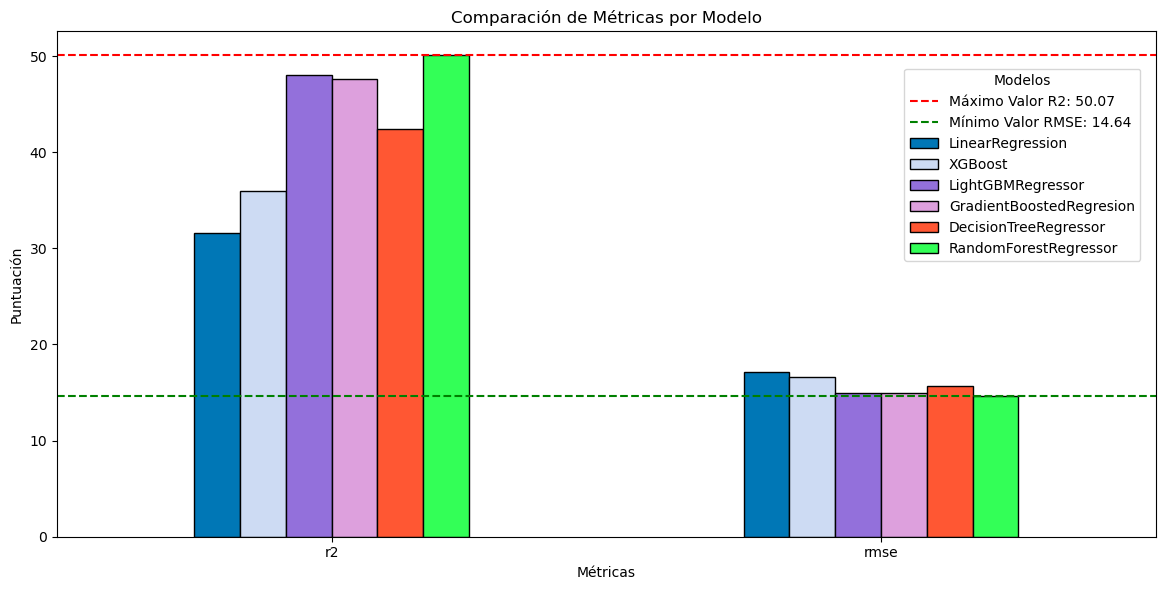

In [104]:
scores.set_index('model', inplace=True)

# Transpone el DataFrame
results_df = scores.T

# Excluye la métrica de MSE del DataFrame
results_df.drop('mse', inplace=True)

# Define los colores para las métricas restantes
colors = ['#0077b6', '#CDDBF3', '#9370DB', '#DDA0DD', '#FF5733', '#33FF57', '#3333FF']

# Grafica el DataFrame con bordes en las barras
ax = results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors, edgecolor='black')

# Líneas de tendencia para el punto máximo y mínimo
max_value = results_df.max().max()
min_value = results_df.min().min()
ax.axhline(y=max_value, color='r', linestyle='--', label=f'Máximo Valor R2: {max_value:.2f}')
ax.axhline(y=min_value, color='g', linestyle='--', label=f'Mínimo Valor RMSE: {min_value:.2f}')

plt.title('Comparación de Métricas por Modelo')
plt.xlabel('Métricas')
plt.ylabel('Puntuación')

# Ajusta la posición de la leyenda
plt.legend(title='Modelos', bbox_to_anchor=(0.765, 0.94), loc='upper left')

plt.tight_layout()
plt.show()

### Al analizar las métricas de los diversos modelos, se observa que tanto LightGBM como GradientBoosted muestran resultados favorables, ya que sus valores de RMSE son altamente aceptables y mantienen tendencias consistentes en los resultados de R2. Sin embargo, no se sitúan como las mejores opciones. Por otro lado, RandomForest demuestra ser superior, ya que muestra una mejor respuesta en R2. Aunque su rendimiento en RMSE es ligeramente mejor que el de LightGBM y GradientBoosted, sus resultados lo posicionan como la mejor opción disponible. No obstante, también se recomienda considerar el uso de LightGBM y GradientBoosted debido a su sólido desempeño.